# Numerical Optimization in Python
### by [Jason DeBacker](https://jasondebacker.com), September 2017

This Jupyter Notebook illustrates how to do numerical optimization in Python using the SciPy package.

## The minimization problem
The general formulation of a nonlinear optimization problem can be written as,

$$ \min_{x \in \mathbb{R}^{n}} : f(x) \quad\text{s.t}\quad g(x)\geq 0 \quad\text{and}\quad h(x) = 0 $$

where $f$ is a nonlinear function of variables $x$, subject to the inequality constraints $g$ and the equality constraints $h$.


## An Example: Minimizing Average Cost

Given the total cost function $C(x) = a + bx + cx^2$ where output $x \geq 0$ and $a$, $b$, $c$ are positive constants.  Average cost is thus given by $AC(x) = ax^{-1} + b + cx$.  Thus the minimization problem here is:

$$ \min_{x \in \mathbb{R}} : f(x) \quad\text{s.t}\quad x\geq 0 $$

The first step will be to declare this average cost function so that we can reference it in our minimization routine.

In [1]:
def avg_cost(x, *params):
    '''
    This function returns the average cost of output x given
    cost parameters a, b, c.
    
    Args:
        x: The amount of output, a scalar.
        params: The cost parameters.  A length-3 tuple.

    Returns:
        ac: The average cost of producing x units of output.
            This is a scalar value.
    '''
    a, b, c = params
    ac = a * (x ** -1) + b + c * x
    
    return ac

With this function we can solve for the minimum analytically.  Taking the derivate of the average cost function and setting it equal to 0 we find that average cost is minimized a $x^{*} = \left(\frac{a}{c}\right)^{\frac{1}{2}}$.  $x = -\left(\frac{a}{c}\right)^{\frac{1}{2}}$ also solves the necessary condition, but since $a$, $b$, $c$ are positive, $x^{*}$ is the only non-negative solution.

Let's look at this function.  To do this, we'll want to import Matplotlib, a packge that allows for some plotting of data.  Including below the import of this package is a magic command to print the Matplotlib plots inline in this notebook.

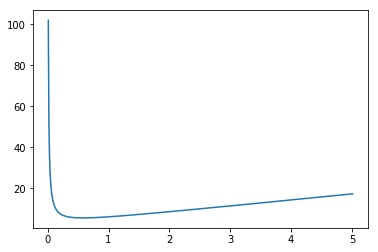

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# set values for a, b, c
a, b, c = 1, 2, 3

# put a, b, c in a tuple called params
params = (a, b, c)

# set a range of x values from 0.01 to 5 with points every 0.01
# use numpy's linspace method
import numpy as np
x = np.linspace(0.01, 5.01, num=500)

# get average cost
ac = avg_cost(x, *params)

# plot average cost against x
plt.plot(x, ac)

Next, we'll need to call this function through some minimization routine.   

## Numerical Optimization with SciPy

[SciPy](https://www.scipy.org) is the leading package for scientific computing in Python.  SciPy offers a great deal, but what we are interested in here are the numerical optimization tools provided by SciPy.  These tools are in the `scipy.optimize` submodule.  This submodule includes rootfinders through `scipy.optimize.root` and minimizers through `scipy.optimize.minimize`.

The `minimize` method offers a number of methods for numerical optimization.  These include several we've discussed in class including the Newton's method, BFGS, Nelder-Meade, Powell's method, and others.  Scipy also offers minimizers specifically for scalar functions in `scipy.optimize.minimize_scalar`.  This includes methods for scalar minimization that we discussed such as Brent's method and golden ratio search.

Let's call a minimizer and see how it works - and whether we get the answer we know we should.  We'll first illustrate using a scalar minimzer and then the more general `scipy.optimize.minimize`.

In [3]:
# import scipy.optimize module
import scipy.optimize as opt

# Let's see some documentation on scipy.optimize.minimize_scalar
help(opt.minimize_scalar)

Help on function minimize_scalar in module scipy.optimize._minimize:

minimize_scalar(fun, bracket=None, bounds=None, args=(), method='brent', tol=None, options=None)
    Minimization of scalar function of one variable.
    
    Parameters
    ----------
    fun : callable
        Objective function.
        Scalar function, must return a scalar.
    bracket : sequence, optional
        For methods 'brent' and 'golden', `bracket` defines the bracketing
        interval and can either have three items ``(a, b, c)`` so that
        ``a < b < c`` and ``fun(b) < fun(a), fun(c)`` or two items ``a`` and
        ``c`` which are assumed to be a starting interval for a downhill
        bracket search (see `bracket`); it doesn't always mean that the
        obtained solution will satisfy ``a <= x <= c``.
    bounds : sequence, optional
        For method 'bounded', `bounds` is mandatory and must have two items
        corresponding to the optimization bounds.
    args : tuple, optional
        E

In [4]:
# call minimizer and use golden ratio search method
# We are setting the tolerance and some options for maximum
# iterations and to display messages about convergence
x_min = opt.minimize_scalar(avg_cost, bracket = [0.1, 2], args=params,
                            method='Golden', tol=1e-15, options={'maxiter': 5000})
print('The minimum of f(x) found numerically is ', x_min['x'])
print('The min of f(x) found analytically is ', (a / c) ** (1 / 2))

The minimum of f(x) found numerically is  0.5773502648532614
The min of f(x) found analytically is  0.5773502691896257


In [5]:
# Try with Brent's method
x_min = opt.minimize_scalar(avg_cost, bracket = [0.1, 2], args=params,
                            method='Brent', tol=1e-15, options={'maxiter': 5000})
print('The minimum of f(x) found numerically is ', x_min['x'])
print('The min of f(x) found analytically is ', (a / c) ** (1 / 2))

The minimum of f(x) found numerically is  0.5773502707037954
The min of f(x) found analytically is  0.5773502691896257


One thing to note about these results.  Both are very close to the true minimum, but Brent's method gets closer.  This is a result of the mathematics behind the golden ratio search method, it cannot get as close to the true minimum as other methods.  If the absolute precision for approximating $f(x)$ is $\varepsilon$ then the golden ratio method will terminate according to a condition that is proportional to $\sqrt{\varepsilon}$.

Now, let's solve the same minimization problem with some more general minimizers.

In [6]:
help(opt.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

In [7]:
# Minimize with Nelder-Mead
x_min = opt.minimize(avg_cost, x0=1.2, args=params, method='Nelder-Mead',
                     tol=1e-15, options={'maxiter': 5000})
print('The minimum of f(x) found numerically is ', x_min['x'])
print('The min of f(x) found analytically is ', (a / c) ** (1 / 2))

The minimum of f(x) found numerically is  [0.57735027]
The min of f(x) found analytically is  0.5773502691896257


In [8]:
# Minimize with BFGS
x_min = opt.minimize(avg_cost, x0=1.2, args=params, method='BFGS',
                     tol=1e-15, options={'maxiter': 5000})
print('The minimum of f(x) found numerically is ', x_min['x'])
print('The min of f(x) found analytically is ', (a / c) ** (1 / 2))

The minimum of f(x) found numerically is  [0.57735026]
The min of f(x) found analytically is  0.5773502691896257


Note that for Newton based methods, the Jacobian is needed. If we set the `jac` key word argument equal to `True`, then SciPy will attempt to compute the Jacobian analyticaly.  Let's see this with an implementation of Newton's method.

In [20]:
# Minimize with (truncated) Newton's method (called Newton Conjugate Gradient method)
x_min = opt.minimize(avg_cost, x0=0.5, args=params, method='Newton-CG',
                     jac=True, tol=1e-15, options={'maxiter': 5000})
print('The minimum of f(x) found numerically is ', x_min['x'])
print('The min of f(x) found analytically is ', (a / c) ** (1 / 2))

IndexError: index 1 is out of bounds for axis 0 with size 1

Oops!  We have a problem!  Even with this simple function, we run into some errors as the numerical derivatives for the Jacobian and Hessians are computed.  

A solution can be to compute the Jacobian and Hessian functions analytically and pass them to the minimizer.  Let's try:

In [21]:
# define the Jacobian function analytically
def jac_ac(x, *params):
    '''
    Compute the Jacobian of the average cost function.
    
    Args:
    x: The amount of output, a scalar.
    params: The cost parameters.  A length-3 tuple.

    Returns:
        ac: The average cost of producing x units of output.
            This is a scalar value.
    '''
    j_ac = -1 * a * x ** -2 + c 
    
    return j_ac

# define the Hessian function analytically
def hess_ac(x, *params):
    '''
    Compute the Jacobian of the average cost function.
    
    Args:
    x: The amount of output, a scalar.
    params: The cost parameters.  A length-3 tuple.

    Returns:
        ac: The average cost of producing x units of output.
            This is a scalar value.
    '''
    h_ac = 2 * a * x ** -3
    
    return h_ac

    
x_min = opt.minimize(avg_cost, x0=1.2, args=params, method='Newton-CG',
                     jac=jac_ac, hess=hess_ac, tol=1e-15, options={'maxiter': 5000})
print('The minimum of f(x) found numerically is ', x_min['x'])
print('The min of f(x) found analytically is ', (a / c) ** (1 / 2))

The minimum of f(x) found numerically is  [-2.17897972e+105]
The min of f(x) found analytically is  0.5773502691896257


/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:1588: RuntimeWarning: overflow encountered in true_divide
  xsupi = dri0 / (-curv) * b
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:273: RuntimeWarning: invalid value encountered in multiply
  return f(xk + alpha * pk, *args)


Note, even with the above, we run into some problems with Newton's method being quite sensitive to the starting values.  Far from the true value (especially to the right of the true value), this gradient method runs into issues with our functional form.  Thus we illustrate the relative robustness of these methods.


## Comparing convergence speeds

We can also compare the convergence properties of these minimizers.  Let's compare the Nelder-Mead simplex method to the Newton-CG method.

In [14]:
# import the time package
import time

# do N calls to the minimizers
N = 5000

start = time.time()
for i in range(N):
    x_min = opt.minimize(avg_cost, x0=0.7, args=params, method='Nelder-Mead',
                     tol=1e-15, options={'maxiter': 5000})
end = time.time()
print('Time for Nelder-Mead = ', end-start)

start = time.time()
for i in range(N):
    x_min = opt.minimize(avg_cost, x0=0.001, args=params, method='Newton-CG',
                     jac=jac_ac, hess=hess_ac, tol=1e-15, options={'maxiter': 5000})
end = time.time()
print('Time for Newton-CG = ', end-start)

Time for Nelder-Mead =  15.008401155471802
Time for Newton-CG =  9.774012327194214


So we can see, even with this simple function, the speed of convergence is faster with a Newton based method.  But as we saw above, this method is more sensitive to starting values.